In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [30]:
data=pd.read_csv("train.csv")
print(data.shape)
print(data.describe)



(1460, 81)
<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     L

In [31]:
ds=pd.DataFrame(data)
print(ds)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [32]:
missing=(data.isnull().sum())
missing_percent=(missing/len(data))*100
missing_data=pd.DataFrame({'Missing values': missing,'Missing percentage':missing_percent})
missing_data = missing_data[missing_data['Missing values'] > 0].sort_values('Missing percentage', ascending=False)
print(missing_data)

              Missing values  Missing percentage
PoolQC                  1453           99.520548
MiscFeature             1406           96.301370
Alley                   1369           93.767123
Fence                   1179           80.753425
MasVnrType               872           59.726027
FireplaceQu              690           47.260274
LotFrontage              259           17.739726
GarageType                81            5.547945
GarageYrBlt               81            5.547945
GarageFinish              81            5.547945
GarageQual                81            5.547945
GarageCond                81            5.547945
BsmtExposure              38            2.602740
BsmtFinType2              38            2.602740
BsmtQual                  37            2.534247
BsmtCond                  37            2.534247
BsmtFinType1              37            2.534247
MasVnrArea                 8            0.547945
Electrical                 1            0.068493


In [33]:
data.drop(columns=['PoolQC','MiscFeature','Alley','MasVnrType','FireplaceQu','LotFrontage'])

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [34]:
data['GarageType'].fillna(data['GarageType'].mode()[0],inplace=True)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_15804\1447676057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageType'].fillna(data['GarageType'].mode()[0],inplace=True)


<Axes: ylabel='GarageType'>

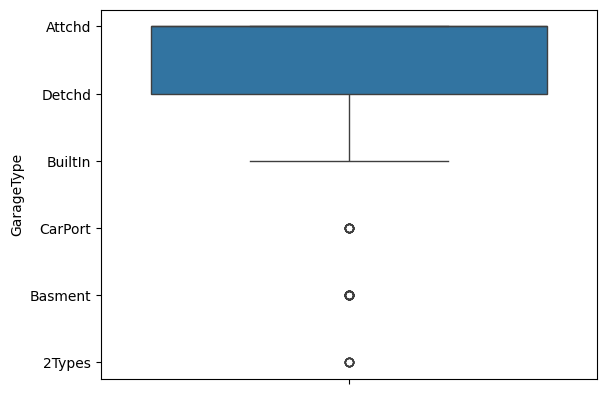

In [35]:
sns.boxplot(data['GarageType'])

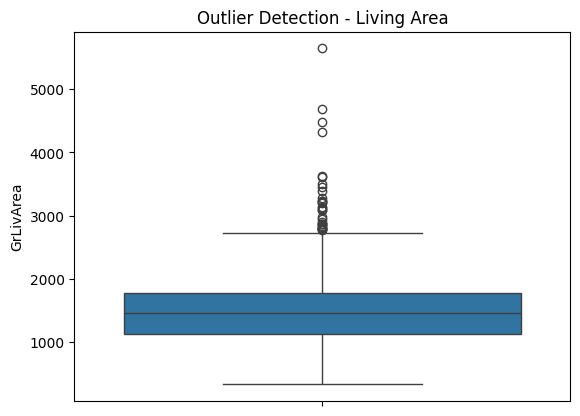

In [36]:
sns.boxplot(data['GrLivArea'])
plt.title("Outlier Detection - Living Area")
plt.show()

In [37]:
Q1=data['GrLivArea'].quantile(0.25)
Q3=data['GrLivArea'].quantile(0.75)
IQR=Q1-Q3
data[(data['GrLivArea']>=Q1-1.5*IQR)&(data['GrLivArea']<=Q3+1.5*IQR)]
# sns.boxplot(data['GrLivArea'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [38]:
print(list(data.columns))
print(data['SalePrice'].head())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [39]:
# skewness=data['SalePrice'].skew()
# print(f"Before transformation skewness {skewness}")
# data['SalePrice']=np.log1p(data['SalePrice'])
# print(f"After transformation {data['SalePrice'].skew()}")

from scipy.stats import skew

# Check skewness
skewness = data['SalePrice'].skew()
print(f"Before transformation: {skewness}")

# Apply log transformation
data['SalePrice'] = np.log1p(data['SalePrice'])

print(f"After transformation: {data['SalePrice'].skew()}")


Before transformation: 1.8828757597682129
After transformation: 0.12134661989685333


In [40]:
print(data['SalePrice'].describe())
print(data['SalePrice'].dtype)
print(data['SalePrice'].nunique())


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64
float64
663


In [41]:
data = pd.get_dummies(data, drop_first=True)


In [ ]:
print(data.isnull().sum().sum())  
print(data.shape)                 


348
(1460, 246)


In [43]:
missing=(data.isnull().sum())
missing_percent=(missing/len(data))*100
missing_data=pd.DataFrame({'Missing values': missing,'Missing percentage':missing_percent})
missing_data = missing_data[missing_data['Missing values'] > 0].sort_values('Missing percentage', ascending=False)
print(missing_data)

             Missing values  Missing percentage
LotFrontage             259           17.739726
GarageYrBlt              81            5.547945
MasVnrArea                8            0.547945


In [46]:
print(data['LotFrontage'].dtype)
data['LotFrontage'].fillna(data['LotFrontage'].mode()[0],inplace=True)

float64


In [47]:
data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [48]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [57]:
missing=data.isnull().sum()
missing_values=pd.DataFrame({'missing values': missing})
print(missing_values)

                       missing values
Id                                  0
MSSubClass                          0
LotFrontage                         0
LotArea                             0
OverallQual                         0
...                               ...
SaleCondition_AdjLand               0
SaleCondition_Alloca                0
SaleCondition_Family                0
SaleCondition_Normal                0
SaleCondition_Partial               0

[246 rows x 1 columns]


VISUALIZATION

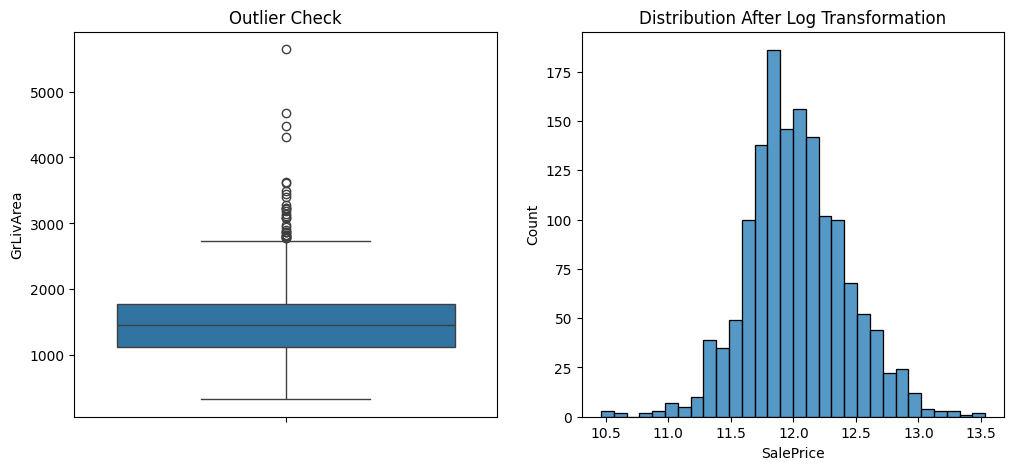

In [60]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y='GrLivArea',data=data,ax=ax[0])
sns.histplot(data['SalePrice'],bins=30,ax=ax[1])
ax[0].set_title("Outlier Check")
ax[1].set_title("Distribution After Log Transformation")
plt.show()